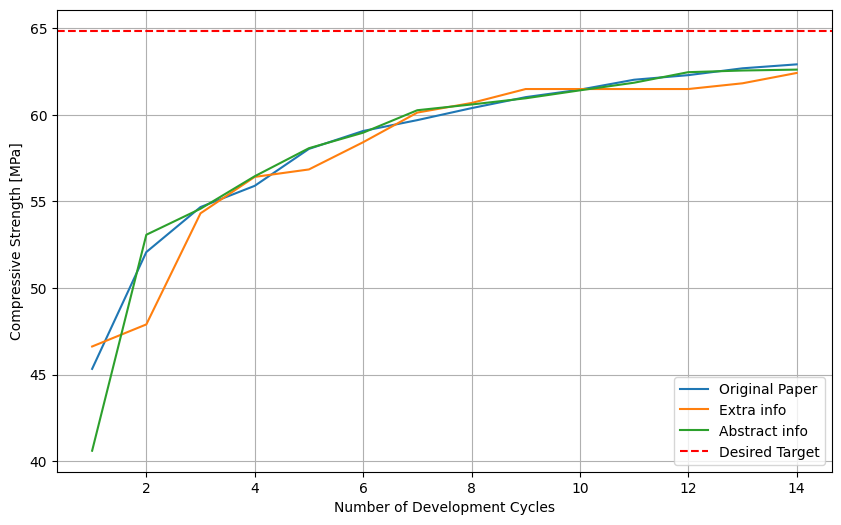

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
from ipywidgets import widgets, VBox
from IPython.display import display, clear_output


def load_data(filename, budget=10):
    df = pd.read_csv(filename)
    strength = df['Compressive Strength'].values

    if len(strength) < budget:
        last_value = strength[-1] if len(strength) > 0 else 0
        strength = np.pad(strength, (0, budget - len(strength)), constant_values=last_value)
    return strength

def load_selected_data(selected_direrctory):
    data = []
    for dir_name in os.listdir(selected_direrctory):
        file = os.path.join(selected_direrctory, dir_name)
        if file.endswith('.csv'):
            strength = load_data(file)
            data.append(strength)
    return data

# directories = ["/Users/yannikmeister/Documents/Capstone_project/Meisterchaeller/Results_Concrete/LLM/Original_paper_none_recursive_0_20241103_161144",
#                 "/Users/yannikmeister/Documents/Capstone_project/Meisterchaeller/Results_Concrete/LLM/authorsandDoiandtitle7_20241025_153056",
#                 "/Users/yannikmeister/Documents/Capstone_project/Meisterchaeller/Results_Concrete/LLM/Paper_info_abstract1_20241025_154250"]

directories = ["/Users/yannikmeister/Documents/Capstone_project/Meisterchaeller/Results_Concrete/LLM/Original_paper_none_recursive_1_20241103_163540",
               "/Users/yannikmeister/Documents/Capstone_project/Meisterchaeller/Results_Concrete/LLM/authorsandDoiandtitle7_20241026_131534",
               "/Users/yannikmeister/Documents/Capstone_project/Meisterchaeller/Results_Concrete/LLM/Paper_info_abstract1_20241026_120205"]


labels = ["Original Paper", "Extra info", "Abstract info"]


plt.figure(figsize=(10, 6))
count = 0
for dir_path in directories:
    data = load_selected_data(dir_path)
    max_length = max(len(arr) for arr in data)
    #max_length = 10
    data = [arr for arr in data if len(arr) == max_length]
    #print(data)
    data = np.array(data)
    #number_of_runs = len(data)
    cumulative_data = []
    for line in data:
        if line is None:
            continue  # Skip if no data for this line
            # Calculate cumulative max for each run
        cumulative_strengths = np.maximum.accumulate(line)
        cumulative_data.append(cumulative_strengths)
    cumulative_data = np.array(cumulative_data)
    average_array = np.mean(cumulative_data, axis=0)

    x = list(range(1, len(average_array) + 1))
    plt.plot(x, average_array, linestyle='-', label=f"{labels[count]}") #, Runs = {number_of_runs}")
    count += 1
    
plt.axhline(y = 64.8637, color='r', linestyle='--', label='Desired Target')
plt.xlabel('Number of Development Cycles')
plt.ylabel('Compressive Strength [MPa]')
#plt.title("Compressive strength – SFDL")
#plt.title("Compressive strength – TVDL")
plt.legend()
plt.grid(True)
plt.show()

